# Biostat HW3
Joseph Cristiano

### Question 1
The data set consists of baseline and 6-Month HDL-C Levels among 28 Participants in a Trial of Black Tea Consumption, with their gender.

We are interested in testing whether the population from which these individuals tends to have improved 6-Month levels of HDL-C that differ from the overall US population as a test of their generalizability. The distribution of HDL-C in the US adult population is well characterized and has a mean of 50.7 mg/dL. Therefore, we would want to determine the impact of Black Tea Consumption among our 28-person sample support a conclusion that the Black Tea Consumption could improve HDL-C Levels back to population norm of 50.7 mg/dL.

You should follow the procedures:

    State the null hypothesis
    State the alternate hypothesis
    Decide on the level of significance
    Choose the sample size
    Determine the statistical technique
    Set up the critical values to identify the reject region and non-reject region
    Collect the data sample and compute sample parameters & Test statistic
    Compare sample/test statistic with critical value/reject or non-reject region.
    Make your conclusion clear.

The data dictionary of the data-set:

    ID = Participant ID
    Sex = Gender: Female, Mal
    BaselineHDLC:   Baseline HDL-C Levels
    6.MonthHDLC:  6-Month HDL-C Levels.


In [1]:
import pandas as pd
# Load the dataset located in the same directory the the jupyter server was launched from
df = pd.read_csv('HDLC.csv')
print(df.head())

   ID     Sex  BaselineHDLC  6-MonthHDLC
0   1  female            64           74
1   2  female            60           70
2   3  female            59           65
3   4    male            65           67
4   5  female            64           62


**State the null hypothesis**     
    In this case, the null hypothesis is that the group with higher black tea consumption does not have a different HDL-C level from the established population mean (50.7 mg/dl).H0: mean = 50.7             
**State the alternate hypothesis**       
    The alternative hypothesis is that the black tea consumer do have a different HDL-C level. H1 mean != 50.7 This will also be a 2-tailed test, as we are testing for change in either direction.        
**Decide on the level of significance**      
    I choose an standard alpha level of 0.05          
**Choose the sample size**           
    The entire dataset, all 28 samples, this does not hit the 30 sample threshold for assumming normal distribution, we will have to confirm the distribution before performing parametric tests.             
**Determine the statistical technique**          
    I would choose a difference of means test, one sample t-test          


In [9]:
# @hide_input
from scipy import stats


# Calculate the critical t-value for a two-tailed test
alpha = 0.05
df_degrees_of_freedom = len(df['6-MonthHDLC']) - 1
critical_value = stats.t.ppf(1 - alpha/2, df_degrees_of_freedom)

# Perform a one-sample t-test
population_mean = 50.7
t_statistic, p_value = stats.ttest_1samp(df['6-MonthHDLC'], population_mean)

print(f"Critical value for rejection region: ±{critical_value}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Critical value for rejection region: ±2.0518305164802833
T-statistic: 4.702185708977525
P-value: 6.781201276769278e-05


**Conclusion**      
Given the critical value of 2.05 and the T-statistic of 4.70. It is safe to reject the null hypothesis. It seems that consumption of black tea DOES have an effect on HDL-C levels.

### Question 2
We are interested in testing whether sample data of 6-Month HDL-C Levels was normally distributed.

Please apply the methods to test normality of 6-Month HDL-C Levels among 28 Participants:

    Visual Method: Create a histogram.
    Visual Method: Create a Q-Q plot.
    Formal Statistical Test: Perform a Kolmogorov-Smirnov Test.
    Formal Statistical Test: Perform a Shapiro-Wilk Test.
    Formal Statistical Test: Perform a Anderson-Darling Test.

When you use formal statistical test, please follow the hypothesis test steps.

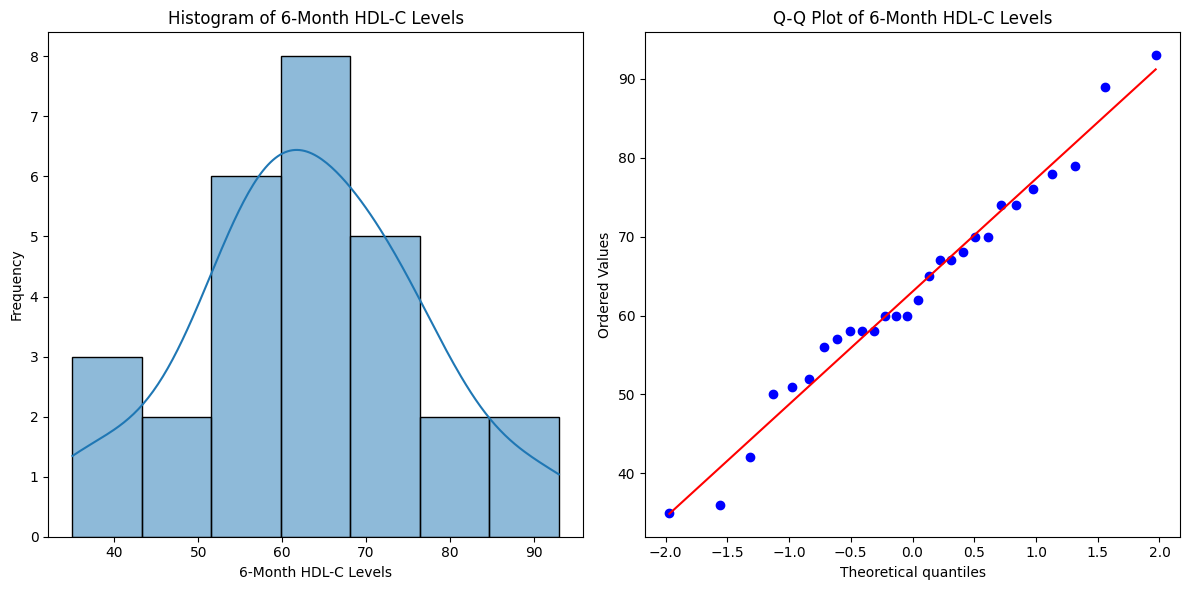

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt
import scipy.stats as stats

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(df['6-MonthHDLC'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of 6-Month HDL-C Levels')
axes[0].set_xlabel('6-Month HDL-C Levels')
axes[0].set_ylabel('Frequency')

# Q-Q plot
stats.probplot(df['6-MonthHDLC'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of 6-Month HDL-C Levels')

# Show the plots
plt.tight_layout()
plt.show()

**Visual Analysis**     
This histogram shows a mostly normal distribution with a slight left skew. The Q-Q plot confirms this as points are pretty close around the 45-degree reference line except at the very bottom where, once again, a slight left skew emerges. 

**Kolmogorov-Smirnov**

In [4]:
# Perform a Kolmogorov-Smirnov Test
ks_statistic, ks_p_value = stats.kstest(df['6-MonthHDLC'], 'norm', args=(50.7, df['6-MonthHDLC'].std()))
# Calculate the critical value for the Kolmogorov-Smirnov test
ks_critical_value = stats.kstwobign.ppf(1 - alpha)

print(f"Critical value for KS test: {ks_critical_value}")
print(f"KS-statistic: {ks_statistic}")
print(f"KS p-value: {ks_p_value}")

Critical value for KS test: 1.3580986393225505
KS-statistic: 0.4344082541913641
KS p-value: 2.5389216711318667e-05


This test is not ideal for small sample sizes. However, with the Null hypothesis being that the sample has a normal distribution. The alternate hypothesis is that the sample distribution is not normal. After performing the test, the test statistic is not higher than the critical value for the test so we cannot reject the null hypothesis. In conclusion, we do not have the evidence to suggest that the sample distribution is not normal.      
**Shapiro-Wilk Test**

In [5]:
# Perform a Shapiro-Wilk Test
shapiro_statistic, shapiro_p_value = stats.shapiro(df['6-MonthHDLC'])

print(f"Shapiro-Wilk statistic: {shapiro_statistic}")
print(f"Shapiro-Wilk p-value: {shapiro_p_value}")

Shapiro-Wilk statistic: 0.979633006564373
Shapiro-Wilk p-value: 0.841525219224972


The closer the Shapiro-Wilk Stat is to 1, the closer the sample distribution is to normal. The P-value is very high, which is probably caused by the small sample size. Be that as it may, the test does suggest that the smaple distribution resembles a normal distribution.         
**Anderson-Darling Test**

In [6]:
# Perform an Anderson-Darling Test
anderson_result = stats.anderson(df['6-MonthHDLC'], dist='norm')

print(f"Anderson-Darling statistic: {anderson_result.statistic}")
print("Critical values:", anderson_result.critical_values)
print("Significance levels:", anderson_result.significance_level)

Anderson-Darling statistic: 0.23651782009319433
Critical values: [0.518 0.59  0.708 0.826 0.983]
Significance levels: [15.  10.   5.   2.5  1. ]


The Anderson-Darling statistic (0.2365) is smaller than all critical values, meaning the data pass the normality test at all common significance levels (even at 1%). This result confirms that the 6-month HDL-C levels in our sample are normally distributed.

### Question 3
An investigator wants to plan a clinical trial to evaluate the efficacy of a new drug designed to increase HDL cholesterol (the "good" cholesterol). The plan is to enroll participants and to randomly assign them to receive either the new drug or a placebo. HDL cholesterol will be measured in each participant after 12 weeks on the assigned treatment. Based on prior experience with similar trials, the investigator expects that 10% of all participants will be lost to follow up or will drop out of the study over 12 weeks. A 95% confidence interval will be estimated to quantify the difference in mean HDL levels between patients taking the new drug as compared to placebo. The investigator would like the margin of error to be no more than 3 units. How many patients should be recruited into the study?  A two sided test will be used with a 5% level of significance.  

To plan this study, we can use data from the Framingham Heart Study. In participants who attended the seventh examination of the Offspring Study and were not on treatment for high cholesterol, the standard deviation of HDL cholesterol is 17.1. 

In [7]:
from statsmodels.stats.power import TTestIndPower

# Initialize the TTestIndPower object
power_analysis = TTestIndPower()

# Define parameters
effect_size = 3 / 17.1  # Margin of error / standard deviation
alpha = 0.05  # significance level for a 95% CI
power = 0.95  # power of 95%

# Calculate the required sample size
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
sample_size = round(sample_size/(1 - 0.10))
print(f"Using the sample size formula for difference of means and adjusting for dropouts, the required sample size per group is {sample_size}")

Using the sample size formula for difference of means and adjusting for dropouts, the required sample size per group is 939


### Question 4
A certain type of skin lesion will develop into cancer in 30% of patients if left untreated. There is a drug on the market that will reduce the probability of cancer developing by 10%. A pharmaceutical company is developing a new drug to treat skin lesions but it will only be worthwhile to do so if the new drug reduces the probability of developing skin cancer by at least 15%, an additional 5% beyond the existing drug.

The pharmaceutical company plans to do a study with patients randomly assigned to two groups, the control (untreated) group and the treatment group. The company wants to know how many subjects will be needed to test a difference in proportions of .15 with a power of 0.80 at alpha equal to 0.05.

In [8]:

from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Define the parameters
alpha = 0.05  # significance level
power = 0.80  # desired power
prop1 = 0.30  # proportion in control group
prop2 = 0.15  # proportion in treatment group
effect_size = proportion_effectsize(prop1, prop2)  # calculate effect size

# Initialize the power analysis object
power_analysis = NormalIndPower()

# Calculate the sample size
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
print(f"Using the sample size formula for a difference in proportions test, the required sample size per group is {round(sample_size)}")



Using the sample size formula for a difference in proportions test, the required sample size per group is 119
